The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
dataset=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')

#### Attribute Information:

date time year-month-day hour:minute:second

Appliances, energy use in Wh

lights, energy use of light fixtures in the house in Wh

T1, Temperature in kitchen area, in Celsius

RH_1, Humidity in kitchen area, in %

T2, Temperature in living room area, in Celsius

RH_2, Humidity in living room area, in %

T3, Temperature in laundry room area

RH_3, Humidity in laundry room area, in %

T4, Temperature in office room, in Celsius

RH_4, Humidity in office room, in %

T5, Temperature in bathroom, in Celsius

RH_5, Humidity in bathroom, in %

T6, Temperature outside the building (north side), in Celsius

RH_6, Humidity outside the building (north side), in %

T7, Temperature in ironing room , in Celsius

RH_7, Humidity in ironing room, in %

T8, Temperature in teenager room 2, in Celsius

RH_8, Humidity in teenager room 2, in %

T9, Temperature in parents room, in Celsius

RH_9, Humidity in parents room, in %

To, Temperature outside (from Chievres weather station), in Celsius

Pressure (from Chievres weather station), in mm Hg

RH_out, Humidity outside (from Chievres weather station), in %

Wind speed (from Chievres weather station), in m/s

Visibility (from Chievres weather station), in km

Tdewpoint (from Chievres weather station), Â°C

rv1, Random variable 1, nondimensional

rv2, Random variable 2, nondimensional


In [3]:
dataset.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
dataset.shape

(19735, 29)

In [5]:
dataset.dtypes

date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

Converting date to datatime format

In [6]:
dataset['date'] = pd.to_datetime(dataset['date'].str.strip(), format='%Y-%m-%d %H:%M:%S')

In [7]:
import datetime as dt
days = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
dataset['day_of_week'] = dataset['date'].dt.dayofweek
dataset['day_of_week']=dataset['day_of_week'].apply(lambda x: days[x])
dataset['week_day'] = np.where(((dataset['date']).dt.dayofweek) < 5,"weekday","weekend")

In [8]:
dataset['day_hour'] = dataset['date'].dt.hour

In [9]:
del dataset['date']

In [10]:
dataset.head(3)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,day_of_week,week_day,day_hour
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,Mon,weekday,17
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,Mon,weekday,17
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,Mon,weekday,17


In [11]:
dataset.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,day_hour
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033,11.502002
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634,6.921953
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322,0.000000
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889,6.000000
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653,12.000000
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769,17.000000
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530,23.000000


In [12]:
dataset.isnull().sum()

Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
day_of_week    0
week_day       0
day_hour       0
dtype: int64

##### Segregating similar columns together for better analysis

In [13]:
col_date = ["day_of_week","week_day","day_hour"]
col_temp = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"]
col_hum = ["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"]
col_weather = ["T_out", "Tdewpoint","RH_out","Press_mm_hg","Windspeed","Visibility"] 
col_light = ["lights"]
col_randoms = ["rv1", "rv2"]
col_target = ["Appliances"]

##### Rearanging dataframe columns

In [14]:
dataset=dataset[col_date + col_temp + col_hum + col_weather + col_light + col_randoms + col_target]

In [15]:
dataset.head(2)

,day_of_week,week_day,day_hour,T1,T2,T3,T4,T5,T6,T7,...,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility,lights,rv1,rv2,Appliances
0,Mon,weekday,17,19.89,19.2,19.79,19.0,17.166667,7.026667,17.2,...,6.600000,5.3,92.0,733.5,7.000000,63.000000,30,13.275433,13.275433,60
1,Mon,weekday,17,19.89,19.2,19.79,19.0,17.166667,6.833333,17.2,...,6.483333,5.2,92.0,733.6,6.666667,59.166667,30,18.606195,18.606195,60


In [16]:
dataset.skew()

day_hour      -0.000673
T1             0.120917
T2             0.889658
T3             0.450777
T4             0.170384
T5             0.558220
T6             0.597471
T7             0.254722
T8            -0.256151
T9             0.382711
RH_1           0.465774
RH_2          -0.268247
RH_3           0.467589
RH_4           0.444614
RH_5           1.866820
RH_6          -0.241961
RH_7           0.242141
RH_8           0.308036
RH_9           0.368937
T_out          0.534273
Tdewpoint      0.239374
RH_out        -0.922997
Press_mm_hg   -0.420442
Windspeed      0.859982
Visibility     0.441554
lights         2.195155
rv1            0.004945
rv2            0.004945
Appliances     3.386367
dtype: float64

In [17]:
#feature_vars.hist(bins = 20, figsize= (12,16))

Humidity - All columns follow normal distribution except RH_6 and RH_out , primarly because these sensors are outside the house

Visibilty - This column is negatively skewed

Windspeed - This column is postively skewed

Skewness in Appliance is 3.38, which is highly positive skew

In [18]:
dataset.lights.describe()

count    19735.000000
mean         3.801875
std          7.935988
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         70.000000
Name: lights, dtype: float64

In [19]:
#dataset_temp['lights'].hist()

As lights column have lot many zero value, median is also zero, skew is high, lets drop this column

In [20]:
del dataset['lights']

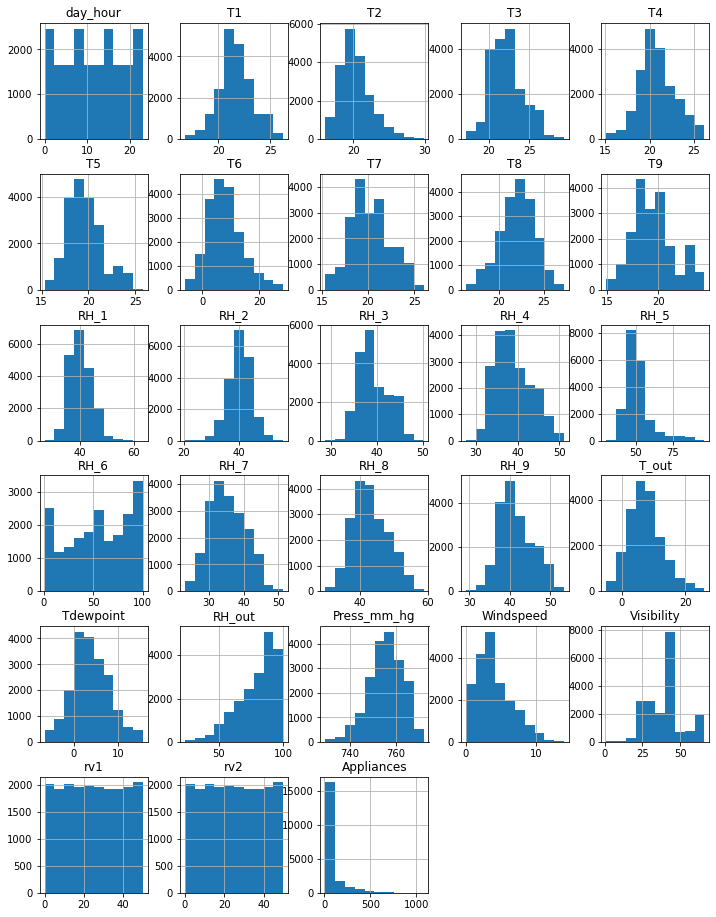

In [21]:
%matplotlib inline
_=dataset.hist(figsize= (12,16))

The distribution of many features are not normal

##### Lets explore the relation between the dependent variable and independent variables

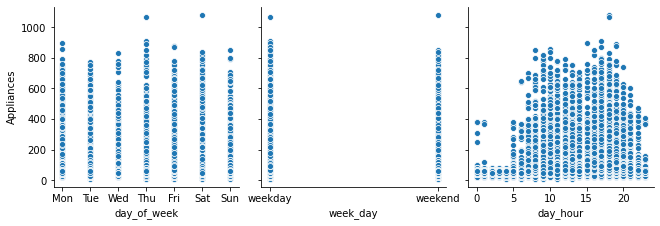

In [22]:
pair_plot = sns.pairplot(data=dataset,
                  y_vars=['Appliances'],
                  x_vars=['day_of_week', 'week_day', 'day_hour'],size=3)

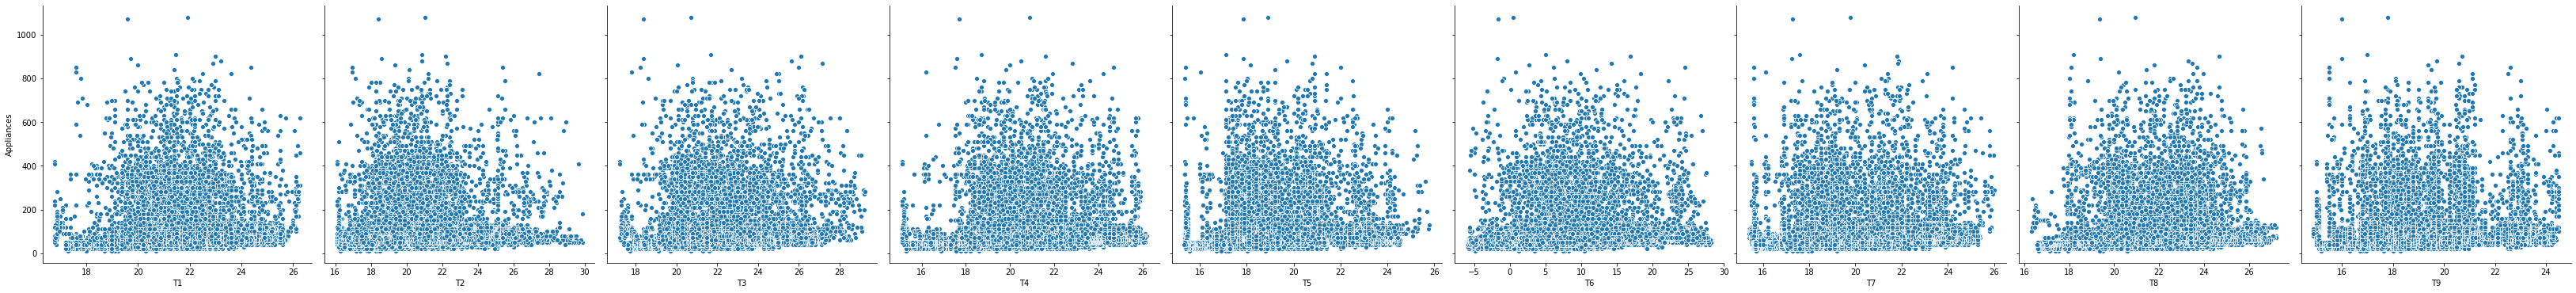

In [23]:
pair_plot = sns.pairplot(data=dataset,
                  y_vars=['Appliances'],
                  x_vars=['T1','T2','T3','T4','T5','T6','T7','T8','T9'],size=5)

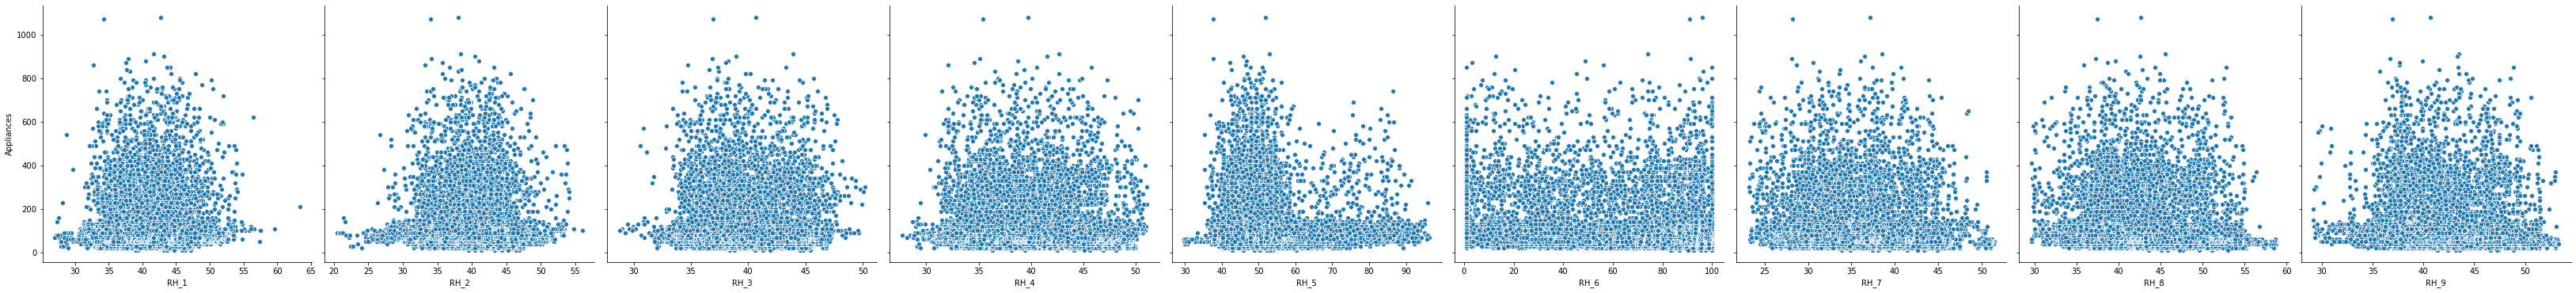

In [24]:
pair_plot = sns.pairplot(data=dataset,
                  y_vars=['Appliances'],
                  x_vars=['RH_1','RH_2','RH_3','RH_4','RH_5','RH_6','RH_7','RH_8','RH_9'],size=5)

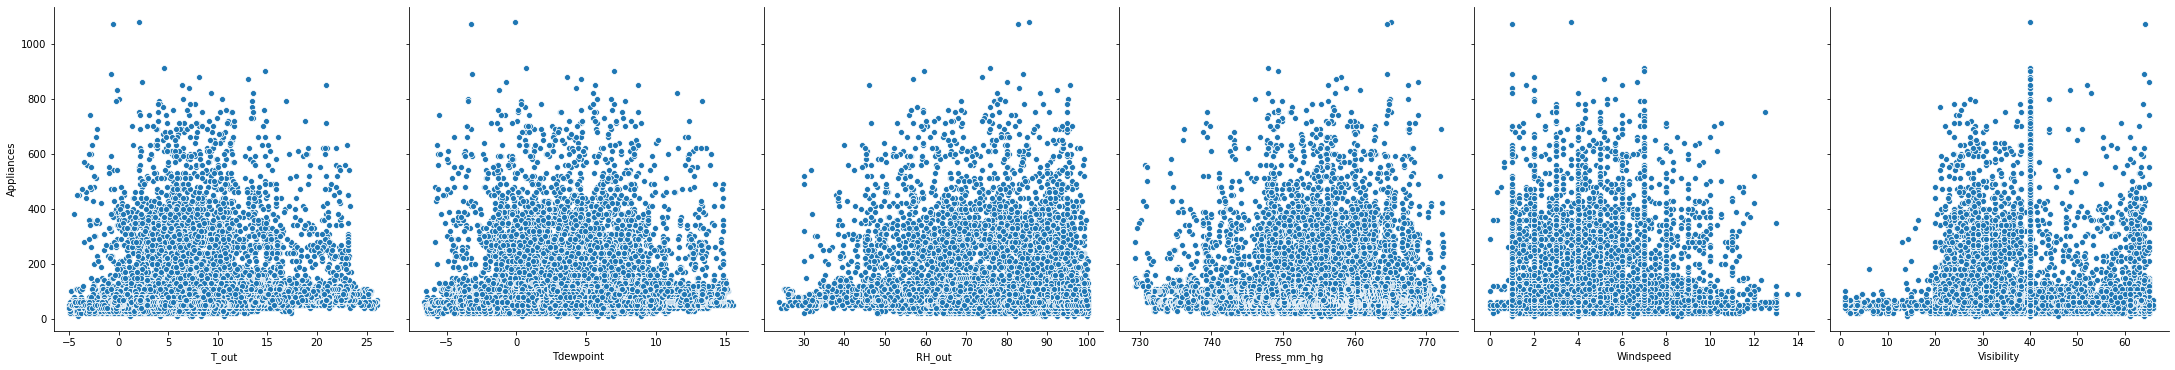

In [25]:
pair_plot = sns.pairplot(data=dataset,
                  y_vars=['Appliances'],
                  x_vars=['T_out','Tdewpoint','RH_out','Press_mm_hg','Windspeed','Visibility'],size=5)


It seems that the dependent variable Appliances, have relation between most of the independent variable, with some features the relation seems to be linear, but in many cases the relation is non linear.

In [26]:
dataset.shape

(19735, 30)

In [27]:
# Seperate dependent and independent variables 
#X = dataset[col_date + col_temp + col_hum + col_weather  + col_randoms ]
x = dataset[col_temp + col_hum + col_weather  + col_randoms ]
y = dataset[col_target]

Data transformation to standardize the distribution

In [28]:
from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(x.values)
X = pd.DataFrame(scaled_features, index=x.index, columns=x.columns)

In [29]:
days= dataset[['day_of_week','week_day','day_hour']]

In [30]:
X.reset_index(drop=True, inplace=True)
days.reset_index(drop=True, inplace=True)

In [31]:
X = pd.concat([days, X], axis=1)

In [32]:
X.head()

,day_of_week,week_day,day_hour,T1,T2,T3,T4,T5,T6,T7,...,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility,rv1,rv2
0,Mon,weekday,17,-1.118645,-0.520411,-1.235063,-0.908217,-1.314903,-0.145196,-1.453646,...,1.141572,0.958136,-0.152647,0.366975,0.82208,-2.976328,1.207694,2.091596,-0.807974,-0.807974
1,Mon,weekday,17,-1.118645,-0.520411,-1.235063,-0.908217,-1.314903,-0.176941,-1.453646,...,1.134554,0.965363,-0.174588,0.343135,0.82208,-2.962813,1.071703,1.766584,-0.440240,-0.440240
2,Mon,weekday,17,-1.118645,-0.520411,-1.235063,-0.944115,-1.314903,-0.221822,-1.453646,...,1.109032,0.950910,-0.196529,0.319294,0.82208,-2.949298,0.935713,1.441572,0.252109,0.252109
3,Mon,weekday,17,-1.118645,-0.520411,-1.235063,-0.962063,-1.314903,-0.242621,-1.485243,...,1.082233,0.926821,-0.218470,0.295454,0.82208,-2.935783,0.799723,1.116559,1.408801,1.408801
4,Mon,weekday,17,-1.118645,-0.520411,-1.235063,-0.962063,-1.296832,-0.253567,-1.453646,...,1.082233,0.926821,-0.240411,0.271613,0.82208,-2.922268,0.663733,0.791547,-1.028122,-1.028122


In [33]:
from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(y.values)
y = pd.DataFrame(scaled_features, index=y.index, columns=y.columns)

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##### Let's see the correlation between data

##### Let's see the correlation between temperature data (T1 to T9)

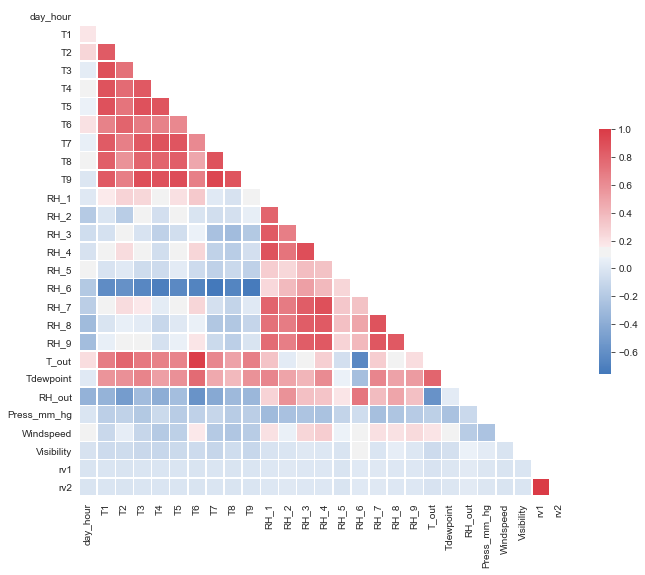

In [35]:
def CorrMtx(df, dropDuplicates = True):
    df = df.corr()
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)


CorrMtx(X_train, dropDuplicates = True)

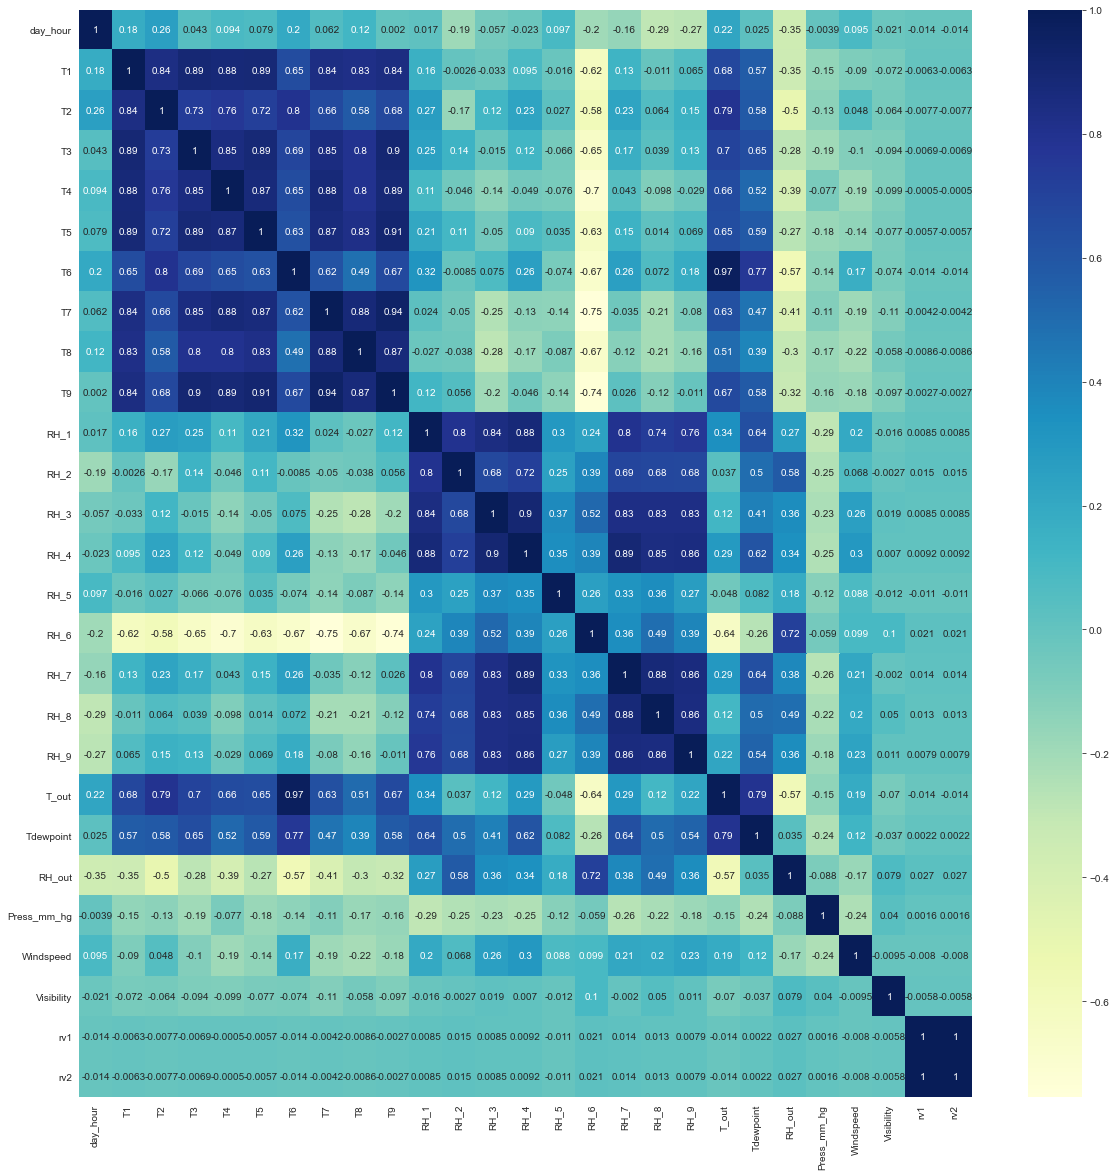

In [97]:
plt.figure(figsize = (20,20))
sns.heatmap(X_train.corr(), annot = True ,cmap = 'YlGnBu')
plt.show()

In [37]:
X_train.head(2)

,day_of_week,week_day,day_hour,T1,T2,T3,T4,T5,T6,T7,...,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility,rv1,rv2
9129,Tue,weekday,2,-0.11617,-1.163390,-0.282948,-0.227789,0.004279,-1.277071,0.247824,...,-0.697934,-0.793084,-1.346868,-1.456824,0.218082,1.470067,-0.832158,2.261168,0.775278,0.775278
2453,Thu,weekday,17,-1.36148,-0.748418,-1.218447,-1.348781,-1.296832,-0.742331,-0.652676,...,0.433334,1.110696,-0.798341,-0.666113,0.374674,1.316898,-0.832158,0.141522,1.256305,1.256305


In [38]:
df_temp=X_train[['day_of_week','week_day']]

In [39]:
df_temp.shape

(13814, 2)

In [40]:
from sklearn.preprocessing import OneHotEncoder
encoder1=OneHotEncoder(sparse=False)
encoder2=OneHotEncoder(sparse=False)
df_temp_encoded_1 = pd.DataFrame (encoder1.fit_transform(df_temp[['day_of_week']]))
df_temp_encoded_2 = pd.DataFrame (encoder2.fit_transform(df_temp[['week_day']]))
df_temp_encoded_1.columns = encoder1.get_feature_names([''])
df_temp_encoded_2.columns = encoder2.get_feature_names([''])
print(df_temp_encoded_1.shape)
print(df_temp_encoded_2.shape)
print(df_temp_encoded_1.head(2))
print(df_temp_encoded_2.head(2))

(13814, 7)
(13814, 2)
   _Fri  _Mon  _Sat  _Sun  _Thu  _Tue  _Wed
0   0.0   0.0   0.0   0.0   0.0   1.0   0.0
1   0.0   0.0   0.0   0.0   1.0   0.0   0.0
   _weekday  _weekend
0       1.0       0.0
1       1.0       0.0


In [41]:
df_temp_encoded_1.reset_index(drop=True, inplace=True)
df_temp_encoded_2.reset_index(drop=True, inplace=True)
X_train.reset_index(drop=True, inplace=True)

In [42]:
X_train_new = pd.concat([X_train, df_temp_encoded_1,df_temp_encoded_2 ], axis=1)

In [43]:
X_train_new.shape

(13814, 38)

In [44]:
X_train_new=X_train_new.drop(['day_of_week', 'week_day'], axis = 1)

In [45]:
X_train_new.head(2)

,day_hour,T1,T2,T3,T4,T5,T6,T7,T8,T9,...,rv2,_Fri,_Mon,_Sat,_Sun,_Thu,_Tue,_Wed,_weekday,_weekend
0,2,-0.11617,-1.163390,-0.282948,-0.227789,0.004279,-1.277071,0.247824,0.036242,-0.011166,...,0.775278,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,17,-1.36148,-0.748418,-1.218447,-1.348781,-1.296832,-0.742331,-0.652676,-1.655890,-1.134597,...,1.256305,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [46]:
df_temp_t=X_test[['day_of_week','week_day']]
encoder3=OneHotEncoder(sparse=False)
encoder4=OneHotEncoder(sparse=False)
df_temp_encoded_3 = pd.DataFrame (encoder3.fit_transform(df_temp_t[['day_of_week']]))
df_temp_encoded_4 = pd.DataFrame (encoder4.fit_transform(df_temp_t[['week_day']]))
df_temp_encoded_3.columns = encoder3.get_feature_names([''])
df_temp_encoded_4.columns = encoder4.get_feature_names([''])
df_temp_encoded_3.reset_index(drop=True, inplace=True)
df_temp_encoded_4.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

In [47]:
X_test_new = pd.concat([X_test, df_temp_encoded_3,df_temp_encoded_4 ], axis=1)

In [48]:
X_test_new = X_test_new.drop(['day_of_week', 'week_day'], axis = 1)

In [49]:
X_test_new.head(2)

,day_hour,T1,T2,T3,T4,T5,T6,T7,T8,T9,...,rv2,_Fri,_Mon,_Sat,_Sun,_Thu,_Tue,_Wed,_weekday,_weekend
0,1,-0.495989,-1.177071,-0.985819,-0.536184,-0.537850,-1.102160,0.631721,0.531484,-0.097202,...,0.043748,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20,0.126666,0.432657,-0.316181,-0.157625,-1.037815,-0.883542,-1.600570,-0.722065,-1.586286,...,-0.104410,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [50]:
np.any(np.isnan(X_train_new))

False

In [51]:
np.all(np.isnan(X_train_new))

False

In [52]:
np.any(np.isnan(y_train))

False

In [53]:
np.all(np.isnan(y_train))

False

In [54]:
X_train_new.reset_index(drop=True, inplace=True)

In [55]:
X_test_new.reset_index(drop=True, inplace=True)

In [56]:
y_train.reset_index(drop=True, inplace=True)

In [57]:
y_test.reset_index(drop=True, inplace=True)

In [58]:
X_train_new.shape

(13814, 36)

In [59]:
from sklearn import preprocessing, model_selection, metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [60]:
models = [['LinearRegression: ', LinearRegression()],['RandomForestRegression: ', RandomForestRegressor()],['SVR:' , SVR(kernel='rbf')]]

In [63]:
import math
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 42
    curr_model_data["Name"] = name
    curr_model.fit(X_train_new,y_train)
    curr_model_data["Train_R2_Score"] = metrics.r2_score(y_train,curr_model.predict(X_train_new))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(y_test,curr_model.predict(X_test_new))
    curr_model_data["Test_RMSE_Score"] = math.sqrt(mean_squared_error(y_test,curr_model.predict(X_test_new)))
    model_data.append(curr_model_data)

In [64]:
model_data

[{'Name': 'LinearRegression: ',
  'Train_R2_Score': 0.15691065975793306,
  'Test_R2_Score': 0.15588642663452368,
  'Test_RMSE_Score': 0.9096116354509776},
 {'Name': 'RandomForestRegression: ',
  'Train_R2_Score': 0.9359501609217808,
  'Test_R2_Score': 0.5679706322458765,
  'Test_RMSE_Score': 0.6507470378998167},
 {'Name': 'SVR:',
  'Train_R2_Score': 0.129775583887353,
  'Test_R2_Score': 0.1303871974950258,
  'Test_RMSE_Score': 0.9232483232676743}]

In [65]:
model_data = pd.DataFrame(model_data)

In [66]:
model_data

,Name,Train_R2_Score,Test_R2_Score,Test_RMSE_Score
0,LinearRegression:,0.156911,0.155886,0.909612
1,RandomForestRegression:,0.935950,0.567971,0.650747
2,SVR:,0.129776,0.130387,0.923248


#### Model building using RFE

In [80]:
from sklearn.feature_selection import RFE
rfr = RandomForestRegressor()
rfr.fit(X_train_new,y_train)

# Subsetting training data for 20 selected columns
rfe = RFE(rfr,10)
rfe.fit(X_train_new,y_train)

RFE(estimator=RandomForestRegressor(), n_features_to_select=10)

In [81]:
list(zip(X_train_new.columns,rfe.support_,rfe.ranking_))

[('day_hour', True, 1),
 ('T1', False, 11),
 ('T2', False, 14),
 ('T3', True, 1),
 ('T4', False, 3),
 ('T5', False, 15),
 ('T6', False, 7),
 ('T7', False, 6),
 ('T8', True, 1),
 ('T9', False, 16),
 ('RH_1', False, 2),
 ('RH_2', True, 1),
 ('RH_3', True, 1),
 ('RH_4', False, 10),
 ('RH_5', False, 4),
 ('RH_6', False, 12),
 ('RH_7', False, 5),
 ('RH_8', True, 1),
 ('RH_9', True, 1),
 ('T_out', True, 1),
 ('Tdewpoint', True, 1),
 ('RH_out', False, 9),
 ('Press_mm_hg', True, 1),
 ('Windspeed', False, 13),
 ('Visibility', False, 17),
 ('rv1', False, 8),
 ('rv2', False, 18),
 ('_Fri', False, 19),
 ('_Mon', False, 20),
 ('_Sat', False, 21),
 ('_Sun', False, 26),
 ('_Thu', False, 25),
 ('_Tue', False, 22),
 ('_Wed', False, 24),
 ('_weekday', False, 23),
 ('_weekend', False, 27)]

In [82]:
cols = X_train_new.columns[rfe.support_]
cols

Index(['day_hour', 'T3', 'T8', 'RH_2', 'RH_3', 'RH_8', 'RH_9', 'T_out',
       'Tdewpoint', 'Press_mm_hg'],
      dtype='object')

In [83]:
X_train_1 = X_train_new[cols]

In [84]:
X_train_1.dtypes

day_hour         int64
T3             float64
T8             float64
RH_2           float64
RH_3           float64
RH_8           float64
RH_9           float64
T_out          float64
Tdewpoint      float64
Press_mm_hg    float64
dtype: object

In [85]:
X_test_1 = X_test_new[cols]

In [86]:
X_train_1.reset_index(drop=True, inplace=True)
X_test_1.reset_index(drop=True, inplace=True)

In [87]:
rfr.fit(X_train_1,y_train)
print("The Train_R2_Score after feature selection "+"{:.2f}".format(metrics.r2_score(y_train,rfr.predict(X_train_1))))
print("The Test_R2_Score after feature selection "+"{:.2f}".format(metrics.r2_score(y_test,rfr.predict(X_test_1))))
print("The Test_RMSE_Score after feature selection "+"{:.2f}".format(math.sqrt(mean_squared_error(y_test,rfr.predict(X_test_1)))))

The Train_R2_Score after feature selection 0.94
The Test_R2_Score after feature selection 0.57
The Test_RMSE_Score after feature selection 0.65


In [107]:
gsc = GridSearchCV(estimator=RandomForestRegressor(),param_grid={'max_depth': range(3,7),'n_estimators': (10, 50, 100, 1000),},
cv=5, scoring='r2', verbose=0, n_jobs=-1)
grid_result = gsc.fit(x, y)
rfc = grid_result.best_estimator_  
rfc.fit(X_train_1,y_train)
rfc_pred=rfc.predict(X_test_1)
print("The best parameters are: ",grid_result.best_estimator_ )
print("The Train_R2_Score: "+"{:.2f}".format(metrics.r2_score(y_train,rfr.predict(X_train_1))))
print("The Test_R2_Score: "+"{:.2f}".format(metrics.r2_score(y_test,rfr.predict(X_test_1))))
print("The Test_RMSE_Score "+"{:.2f}".format(math.sqrt(mean_squared_error(y_test,rfr.predict(X_test_1)))))

The best parameters are:  RandomForestRegressor(max_depth=3)
The Train_R2_Score: 0.94
The Test_R2_Score: 0.57
The Test_RMSE_Score 0.65


##### Even after reducing features, and hyperparameter tuning the accuracy is almost same, however the project is not completed, as different models can be selected for further accuracy